<a href="https://colab.research.google.com/github/jpistotnik/207ish/blob/proj/Final_Project_Revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip3 install -U tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.2 MB 5.1 MB/s 
     |████████████████████████████████| 588.3 MB 21 kB/s 
     |████████████████████████████████| 439 kB 76.1 MB/s 
     |████████████████████████████████| 1.7 MB 56.2 MB/s 
     |████████████████████████████████| 6.0 MB 39.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.

In [2]:
# standard and PIL Image
import pandas as pd
import numpy as np
import random
import os
from PIL import Image

# tf and keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
import tensorflow_decision_forests as tfdf

# plots
import seaborn as sns
import matplotlib.pyplot as plt

random.seed(2)
%matplotlib inline

IMAGE_PATH = '/content/drive/MyDrive/w207_final_project/archive/' 

ModuleNotFoundError: ignored

In [ ]:
def preprocessing_labels():
    image_values_df = pd.read_csv('/content/drive/MyDrive/w207_final_project/archive/ISIC_2019_Training_GroundTruth.csv')
    image_values_df["type"] = image_values_df[["MEL", "NV", "BCC", "AK", "BKL", "DF", "SCC", "VASC"]].idxmax(axis=1)
    image_values_df = image_values_df[['image', 'type']]
    print("Number of rows in Image data set before Merge:", len(image_values_df))
    metadata_df = pd.read_csv('/content/drive/MyDrive/w207_final_project/archive/ISIC_2019_Training_Metadata.csv')
    print("Number of rows in Metadata data set before Merge:", len(metadata_df))
    image_values_df = image_values_df.merge(metadata_df, on = 'image', how = 'inner')
    print("Number of rows in Merged Dataset:", len(image_values_df))
    return image_values_df

In [ ]:
labels_df = preprocessing_labels()
labels_df

# MultiClass Classification

NV: 12875
MEL: 4522
BCC: 3323
BKL: 2624
AK: 867
SCC: 628
VASC: 253
DF: 239
Proportion of examples in NV Class: 50.83%


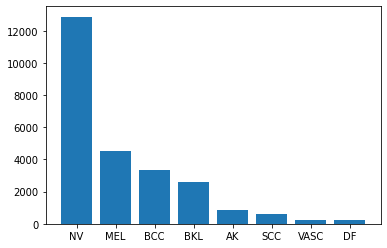

In [ ]:
plt.bar(x = labels_df['type'].value_counts().index, height = labels_df['type'].value_counts())
for i in labels_df['type'].value_counts().index:
    print(i, ": ", labels_df['type'].value_counts()[i], sep = '')  
print("Proportion of examples in NV Class: ", 
      round(labels_df['type'].value_counts()['NV'] / len(labels_df)*100, 2), '%', sep = '')

In [3]:
np.random.seed(1234)

NV = labels_df[labels_df['type'] == 'NV']
MEL = labels_df[labels_df['type'] == 'MEL']
BCC = labels_df[labels_df['type'] =='BCC']
BKL = labels_df[labels_df['type'] =='BKL']
AK = labels_df[labels_df['type'] =='AK']
SCC = labels_df[labels_df['type'] =='SCC']
VASC = labels_df[labels_df['type'] =='VASC']
DF = labels_df[labels_df['type'] =='DF']


# randomly draw 80 images from each classes
temp_NV = []
temp_MEL = []
temp_BCC = []
temp_BKL = []
temp_AK = []
temp_SCC = []
temp_VASC = []
temp_DF = []

temp_NV = list(np.random.choice(
    NV.image,
    size=100,
    replace=False
))

temp_MEL = list(np.random.choice(
    MEL.image,
    size=100,
    replace=False
))

temp_BCC = list(np.random.choice(
    BCC.image,
    size=100,
    replace=False
))

temp_BKL = list(np.random.choice(
    BKL.image,
    size=100,
    replace=False
))

temp_AK = list(np.random.choice(
    AK.image,
    size=100,
    replace=False
))

temp_SCC = list(np.random.choice(
    SCC.image,
    size=100,
    replace=False
))

temp_VASC = list(np.random.choice(
    VASC.image,
    size=100,
    replace=False
))

temp_DF = list(np.random.choice(
    DF.image,
    size=100,
    replace=False
))

NameError: ignored

In [ ]:
def preprocess_data_part1(IMAGE_PATH):
    """ Generate lists of images and labelsbased on temp_no_refer and temp_refer lists
    
    Params:
    -------
    IMAGE_PATH (str): path to directory with images.
    LABEL_PATH (str): path to directory with labels.
    
    Returns:
    --------
    images_mini  (np.ndarray): Images of shape (N, 224, 224, 3)
    y_mini (np.ndarray): Labels of shape (N,)    
    """
    y_mini = []
    images_mini = []
    count = 0
    # create lists of images and labels `images_mini` and `y_mini` 
    # based on temp tables created above for each diagnoses class
    for folder in labels_df['type'].unique():
        for idx, img in enumerate(os.listdir(IMAGE_PATH + folder + '/')):
            count+=1
            # read labels
            if img.split('.')[0] in temp_NV:
                    y_mini.append(0)
            elif img.split('.')[0] in temp_MEL:
                    y_mini.append(1)
            elif img.split('.')[0] in temp_BCC:
                    y_mini.append(2)
            elif img.split('.')[0] in temp_BKL:
                    y_mini.append(3)
            elif img.split('.')[0] in temp_AK:
                    y_mini.append(4)
            elif img.split('.')[0] in temp_SCC:
                    y_mini.append(5)
            elif img.split('.')[0] in temp_VASC:
                    y_mini.append(6)
            elif img.split('.')[0] in temp_DF:
                    y_mini.append(7)
            else:
                continue

        
            # read image
            img = load_img(
                IMAGE_PATH + folder +'/'+ img,
                target_size=(300, 225)
            )

            # transform image to array
            img = img_to_array(img)

            # append to images
            images_mini.append(img)
            count+=1
        print(count)
    # stack images and transform to array
    images_mini = np.stack(images_mini)
    y_mini = np.array(y_mini).flatten() 
    
    return images_mini, y_mini

In [ ]:
# generate images and labels based on preprocess_data_part1() function
images_mini, y_mini = preprocess_data_part1(IMAGE_PATH)

print(f"images_mini shape {images_mini.shape}")
print(f"y_mini shape {y_mini.shape}")
sum(y_mini)

0
3414
3414
3414
3414
3414
3414
3414
images_mini shape (72, 300, 225, 3)
y_mini shape (72,)


72

In [ ]:
tf.random.set_seed(1234)

fig = plt.figure(figsize=(14, 12))

# pull first image from data
image = images_mini[0]

# plot original
ax = fig.add_subplot(1, 5, 1)
ax.imshow(array_to_img(image))
ax.set_title('Original', size=15);

# resize
ax = fig.add_subplot(1, 5, 2)
img_resize = tf.image.resize(image, size=(224, 224))
ax.imshow(array_to_img(img_resize))
ax.set_title('Step 1: Resize', size=15);


# adjust brightness
ax = fig.add_subplot(1, 5, 3)
img_bright = tf.image.adjust_brightness(img_resize, 0.3)
ax.imshow(array_to_img(img_bright))
ax.set_title('Step 2: Brightness', size=15);


# adjust contrast
ax = fig.add_subplot(1, 5, 4)
img_contrast = tf.image.adjust_contrast(img_bright, contrast_factor=3)
ax.imshow(array_to_img(img_contrast))
ax.set_title('Step 3: Contrast', size=15);


# flip left right
ax = fig.add_subplot(1, 5, 5)
img_flip = tf.image.flip_left_right(img_contrast)
ax.imshow(array_to_img(img_flip))
ax.set_title('Step 4: Flip left right', size=15);

In [ ]:
IMAGE_SIZE = (300, 225)
CONTRAST_FACTOR = 3
DELTA = 0.3

def preprocess_data_part2(images, y, split=(0.6,0.2,0.2)):
    """ Split data into train, validation and test sets; apply transformaions and augmentations
    
    Params:
    -------
    images  (np.ndarray): Images of shape (N, 224, 224, 3)
    y (np.ndarray): Labels of shape (N,)   
    split (tuple): 3 values summing to 1 defining split of train, validation and test sets
    
    Returns:
    --------
    X_train (np.ndarray): Train images of shape (N_train, 224, 224, 3)
    y_train (np.ndarray): Train labels of shape (N_train,)
    X_val (np.ndarray): Val images of shape (N_val, 224, 224, 3)
    y_val (np.ndarray): Val labels of shape (N_val,)
    X_test (np.ndarray): Test images of shape (N_test, 224, 224, 3)
    y_test (np.ndarray): Test labels of shape (N_test,)
    
    """
    
    ### create train/validation/test sets ###
    #########################################
    # NOTE: Each time you run this cell, you'll re-shuffle the data. The ordering will be the same due to the random seed generator 
    tf.random.set_seed(1234)
    np.random.seed(1234)
    shuffle = np.random.permutation(np.arange(images.shape[0]))
    images, y = images[shuffle], y[shuffle]
    
    splits = np.multiply(len(images_mini), split).astype(int)
    X_train, X_val, X_test = np.split(images_mini, [splits[0], splits[0]+splits[1]])
    y_train, y_val, y_test = np.split(y_mini, [splits[0], splits[0]+splits[1]])
    
    ### image transformation on training, validation, and test data ###
    ###################################################################
    # image resize
    X_train = tf.image.resize(X_train, size=IMAGE_SIZE)
    X_val = tf.image.resize(X_val, size=IMAGE_SIZE)
    X_test = tf.image.resize(X_test, size=IMAGE_SIZE)
    
    # rescale image to [0,1], i.e., greyscale
    X_train = X_train/255.0
    X_val = X_val/255.0
    X_test = X_test/255.0
    
    
    ### image augmentation on training data ###
    ###########################################
    # adjust brightness
    X_train_augm = tf.image.adjust_brightness(X_train, delta=DELTA)
    
    # adjust contrast
    X_train_augm = tf.image.adjust_contrast(X_train_augm, contrast_factor=CONTRAST_FACTOR)

    # random flip
    X_train_augm = tf.image.random_flip_left_right(X_train_augm)
    
    # concatenate original X_train and augmented X_train data
    X_train = tf.concat([X_train, X_train_augm],axis=0)
    
    # concatenate y_train (note the label is preserved)
    y_train_augm = y_train
    y_train = tf.concat([y_train, y_train_augm],axis=0)
    
    # shuffle X_train and y_train, i.e., shuffle two tensors in the same order
    shuffle = tf.random.shuffle(tf.range(tf.shape(X_train)[0], dtype=tf.int32))
    X_train = tf.gather(X_train, shuffle)
    y_train = tf.gather(y_train, shuffle).numpy() #also transforms y_train to numpy array
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = preprocess_data_part2(
    images_mini,
    y_mini,
    split=(0.6,0.2,0.2)
)

print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_val shape {X_val.shape}")
print(f"y_val shape {y_val.shape}")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

In [ ]:
# print taining data
print('Print training data examples:')
nrows, ncols = 1,4 #print first 4 images
f, axs = plt.subplots(nrows, ncols, figsize=(14,12))
for i in range(ncols):
    axs[i].imshow(array_to_img(X_train[i]))
    axs[i].set(title=y_train[i])

In [ ]:
# print test data
print('Print validation data examples:')
nrows, ncols = 1,4 #print first 4 images
f, axs = plt.subplots(nrows, ncols, figsize=(14,12))
for i in range(ncols):
    axs[i].imshow(array_to_img(X_val[i]))
    axs[i].set(title=y_val[i])

In [ ]:
model = tf.keras.Sequential()

# add first convolution layer to the model
model.add(tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(5, 5),
    strides=(1, 1),
    padding='same',
    data_format='channels_last',
    name='conv_1',
    activation='relu'))


# add a max pooling layer with pool size (2,2) and strides of 2
# (this will reduce the spatial dimensions by half)
model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    name='pool_1'))


# add second convolutional layer
model.add(tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(5, 5),
    strides=(1, 1),
    padding='same',
    name='conv_2',
    activation='relu'))

# add second max pooling layer with pool size (2,2) and strides of 2
# (this will further reduce the spatial dimensions by half)
model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), name='pool_2')
)


# add a fully connected layer (need to flatten the output of the previous layers first)
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(
    units=1024,
    name='fc_1', 
    activation='relu'))

# add dropout layer
model.add(tf.keras.layers.Dropout(
    rate=0.5))

# add the last fully connected layer
# this last layer sets the activation function to "None" in order to output the logits 
# note that passing activation = "sigmoid" will return class memembership probabilities but
# in TensorFlow logits are prefered for numerical stability
# set units=1 to get a single output unit (remember it's a binary classification problem)
model.add(tf.keras.layers.Dense(
    units=1,
    name='fc_2',
    activation=None))


# build model and print summary
tf.random.set_seed(1)
model.build(input_shape=(None, 300, 225, 3))
model.summary()

In [ ]:
#creating grouped tables for plotting
new_df = labels_df[['type','image', 'anatom_site_general','sex']]
new_df = pd.concat([new_df, pd.get_dummies(new_df['anatom_site_general'])], axis=1)
new_df = pd.concat([new_df, pd.get_dummies(new_df['sex'])], axis=1) 
grouped = new_df.groupby('type').agg('sum')
grouped_short = grouped[['anterior torso', 'head/neck','lateral torso',
                                                        'lower extremity','oral/genital', 'palms/soles',
                                                        'posterior torso', 'upper extremity']]
deep_group = new_df.groupby(['type', 'anatom_site_general']).agg('sum')
sex_deep_group = new_df.groupby(['type', 'sex']).agg('sum')
deep_group = deep_group[['anterior torso', 'head/neck', 'lateral torso', 'lower extremity',
       'oral/genital', 'palms/soles', 'posterior torso', 'upper extremity']]
deep_group['total'] = deep_group.sum(axis = 1)
sex_deep_group['total'] = sex_deep_group[['male', 'female']].sum(axis = 1)
totals = sex_deep_group.reset_index().groupby('type').agg('sum')['total']
sex_deep_group['total'] = sex_deep_group[['male', 'female']].sum(axis = 1)
the_totals= []
for i in range(len(sex_deep_group)):
  curr_val = sex_deep_group.iloc[i, :]['total']
  if i % 2 == 0:
    the_totals.append(curr_val + sex_deep_group.iloc[i + 1, :]['total'])
  else:
    the_totals.append(curr_val + sex_deep_group.iloc[i - 1, :]['total'])
sex_deep_group['total_prop'] = sex_deep_group['total'].values / np.array(the_totals)
super_deep = new_df.groupby(['type', 'sex', 'anatom_site_general']).agg('sum')
super_deep['total'] = super_deep[['male', 'female']].sum(axis = 1)
totals = super_deep.reset_index().groupby('type').agg('sum')['total']
the_totals= []
for i in range(len(super_deep)):
  curr_val = super_deep.iloc[i, :]['total']
  if i % 2 == 0:
    the_totals.append(curr_val + super_deep.iloc[i + 1, :]['total'])
  else:
    the_totals.append(curr_val + super_deep.iloc[i - 1, :]['total'])
super_deep['total_prop'] = super_deep['total'].values / np.array(the_totals)


In [ ]:
#creating some plots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25,20))
fig.suptitle("Proportion of Skin Lesion by Location Broken Down by Lesion Type", size = 40)
row = 0
column = 0
for i in range(len(grouped_short.index)):
    bar = sns.barplot(x = grouped_short.columns,
                      y = grouped_short.iloc[i,:] / grouped_short[grouped_short.index == grouped_short.index[i]].sum(axis = 1)[0],
                      ax = axes[row][column])
    bar.set_xticklabels(labels = grouped_short.columns,
                        rotation=30)
    column += 1
    if column == 4:
        row = 1
        column = 0

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25,20))
fig.suptitle("Proportion of Skin Lesion's in each Location Broken Down by Lesion Type", size = 40)
row = 0
column = 0
for i in range(len(grouped_short.columns)):
    bar = sns.barplot(x = grouped_short.index,
                      y = grouped_short.iloc[:,i] / grouped_short.iloc[:,i].sum(),
                      ax = axes[row][column])
    bar.set_xticklabels(labels = grouped_short.index,
                        rotation=30)
    column += 1
    if column == 4:
        row = 1
        column = 0

In [ ]:
plt.figure(figsize=(30, 30))
sns.catplot(x='type', y='total', hue='anatom_site_general', data=deep_group[['total']].reset_index(), kind='bar', aspect = 40/10)

In [ ]:
plt.figure(figsize=(30, 30))
sns.catplot(x='type', y='total_prop', hue='sex', data=sex_deep_group.reset_index(), kind='bar', aspect = 40/10)

In [ ]:
sns.catplot(x='sex', y='total_prop', hue='anatom_site_general', data=super_deep.reset_index(), kind='bar', aspect = 40/10)

In [ ]:
sns.catplot(x='sex', y='total_prop', hue='anatom_site_general', data=super_deep.reset_index(), kind='bar', aspect = 40/10)

In [ ]:
is_melanoma = [1 if i == 'MEL' else 0 for i in labels_df['type']]
mel_df = labels_df[['image', 'age_approx', 'anatom_site_general', 'lesion_id',
       'sex']]
mel_df["is_mel"] = is_melanoma
mel_df
m = sns.barplot(x = mel_df['is_mel'].value_counts().index, y = mel_df['is_mel'].value_counts().values)
m.set_xticklabels(["Not Melanoma", "Melanoma"])

In [ ]:
mel_df.groupby('sex').agg('mean')

In [ ]:
mel_df.groupby('is_mel').agg('mean')

# BEGGINING MELANOMA ONLY ANALYSIS

In [152]:
images = pd.read_csv('/content/drive/MyDrive/w207_final_project/our_images.csv')
labels_df = labels_df[labels_df['image'].isin(list(images['image_id'].values
                                                   ))][['image', 'type', 'age_approx', 
                                                        'anatom_site_general', 'sex']].dropna()
images_1 = images['image_id'].isin(labels_df['image'].values)
labels_df = labels_df.sort_values('image')
labels_df['image_data'] = images[images_1].sort_values('image_id')['images'].values
labels_df

,image,type,age_approx,anatom_site_general,sex,image_data
7,ISIC_0000008,NV,30.0,anterior torso,female,[[[167. 164. 175.]\n [153. 150. 161.]\n [160...
18,ISIC_0000019_downsampled,NV,30.0,posterior torso,female,[[[ 0. 0. 2.]\n [ 0. 0. 2.]\n [ 0...
21,ISIC_0000022_downsampled,MEL,55.0,lower extremity,female,[[[ 9. 7. 8.]\n [ 2. 0. 1.]\n [ 0...
22,ISIC_0000023_downsampled,NV,30.0,anterior torso,female,[[[ 0. 0. 2.]\n [ 0. 0. 4.]\n [ 0...
23,ISIC_0000024_downsampled,NV,45.0,posterior torso,male,[[[ 0. 0. 2.]\n [ 0. 1. 3.]\n [ 1...
...,...,...,...,...,...,...
25322,ISIC_0073241,MEL,60.0,palms/soles,male,[[[ 7. 5. 6.]\n [11. 6. 10.]\n [13. 12. 1...
25325,ISIC_0073246,BCC,80.0,anterior torso,male,[[[0. 0. 0.]\n [0. 0. 0.]\n [1. 1. 1.]\n .....
25326,ISIC_0073247,BCC,85.0,head/neck,female,[[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]\n .....
25327,ISIC_0073248,BKL,65.0,anterior torso,male,[[[ 87. 83. 84.]\n [ 87. 82. 86.]\n [ 91...


In [154]:
is_melanoma = [1 if i == 'MEL' else 0 for i in labels_df['type']]
mel_df = labels_df.sort_values('image')
mel_df['is_mel'] = is_melanoma
mel_df['image_data'].values

array(['[[[167. 164. 175.]\n  [153. 150. 161.]\n  [160. 157. 168.]\n  ...\n  [196. 203. 213.]\n  [194. 203. 218.]\n  [204. 208. 217.]]\n\n [[165. 162. 173.]\n  [156. 153. 164.]\n  [161. 158. 169.]\n  ...\n  [200. 207. 217.]\n  [198. 207. 222.]\n  [204. 208. 217.]]\n\n [[162. 159. 170.]\n  [164. 161. 172.]\n  [164. 161. 172.]\n  ...\n  [200. 207. 217.]\n  [198. 207. 222.]\n  [201. 205. 214.]]\n\n ...\n\n [[182. 175. 183.]\n  [185. 178. 186.]\n  [186. 179. 187.]\n  ...\n  [213. 220. 226.]\n  [215. 219. 231.]\n  [219. 219. 227.]]\n\n [[182. 175. 182.]\n  [182. 175. 182.]\n  [187. 180. 187.]\n  ...\n  [214. 222. 225.]\n  [216. 220. 231.]\n  [219. 220. 224.]]\n\n [[182. 176. 180.]\n  [183. 177. 181.]\n  [182. 176. 180.]\n  ...\n  [215. 223. 225.]\n  [217. 221. 230.]\n  [226. 227. 229.]]]',
       '[[[  0.   0.   2.]\n  [  0.   0.   2.]\n  [  0.   0.   2.]\n  ...\n  [  0.   1.   0.]\n  [  0.   0.   0.]\n  [  1.   1.   3.]]\n\n [[178. 177. 182.]\n  [181. 180. 185.]\n  [185. 184. 192.]\n  ...\

In [139]:
mel_sample = mel_df.sample(4000)
is_melanoma = [1 if i == 'MEL' else 0 for i in sample_df['type']]
sample_df['is_mel'] = is_melanoma
sum(sample_df['is_mel'])

870

In [12]:
def preprocess_data_part1(IMAGE_PATH):
    """ Generate lists of images and labelsbased on temp_no_refer and temp_refer lists
    
    Params:
    -------
    IMAGE_PATH (str): path to directory with images.
    LABEL_PATH (str): path to directory with labels.
    
    Returns:
    --------
    images_mini  (np.ndarray): Images of shape (N, 224, 224, 3)
    y_mini (np.ndarray): Labels of shape (N,)    
    """
    y_mini = []
    images_mini = []

    # create lists of images and labels `images_mini` and `y_mini` 
    # based on temp_no_refer and temp_refer selections
    for folder in labels_df['type'].unique():
        for idx, img in enumerate(os.listdir(IMAGE_PATH + folder + '/')):
            # read labels
            if img.split('.')[0] in temp_not_mel:
                y_mini.append(0)
            elif img.split('.')[0] in temp_mel:
                y_mini.append(1)
            else:
                continue

        
            # read image
            img = load_img(
                IMAGE_PATH + folder + '/' + img,
                target_size=(128, 128)
            )
            
            # transform image to array
            img = img_to_array(img)

            # append to images
            images_mini.append(img)
    print('hi')
    # stack images and trasnform to array
    images_mini = np.stack(images_mini)
    y_mini = np.array(y_mini).flatten() 
    
    return images_mini, y_mini

In [147]:
# generate images and labels based on preprocess_data_part1() function
mel_images_mini, mel_mini = np.array(sample_df['image_data'].values), np.array(sample_df['is_mel'].values)

print(f"mel_images_mini shape {mel_images_mini.shape}")
print(f"mel_mini shape {mel_mini.shape}")

mel_images_mini shape (4000,)
mel_mini shape (4000,)


In [151]:
mel_images_mini[1].imshow()

AttributeError: ignored

ValueError: ignored

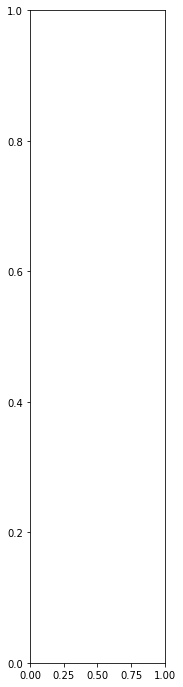

In [149]:
tf.random.set_seed(1234)

fig = plt.figure(figsize=(14, 12))

# pull first image from data
image = mel_images_mini[0]

# plot original
ax = fig.add_subplot(1, 5, 1)
ax.imshow(array_to_img(image))
ax.set_title('Original', size=15);

# resize
ax = fig.add_subplot(1, 5, 2)
img_resize = tf.image.resize(image, size=(224, 224))
ax.imshow(array_to_img(img_resize))
ax.set_title('Step 1: Resize', size=15);


# adjust brightness
ax = fig.add_subplot(1, 5, 3)
img_bright = tf.image.adjust_brightness(img_resize, 0.3)
ax.imshow(array_to_img(img_bright))
ax.set_title('Step 2: Brightness', size=15);


# adjust contrast
ax = fig.add_subplot(1, 5, 4)
img_contrast = tf.image.adjust_contrast(img_bright, contrast_factor=3)
ax.imshow(array_to_img(img_contrast))
ax.set_title('Step 3: Contrast', size=15);


# flip left right
ax = fig.add_subplot(1, 5, 5)
img_flip = tf.image.flip_left_right(img_contrast)
ax.imshow(array_to_img(img_flip))
ax.set_title('Step 4: Flip left right', size=15);

In [ ]:
IMAGE_SIZE = (300, 225)
CONTRAST_FACTOR = 3
DELTA = 0.3

def preprocess_data_part2(images, y, split=(0.6,0.2,0.2)):
    """ Split data into train, validation and test sets; apply transformaions and augmentations
    
    Params:
    -------
    images  (np.ndarray): Images of shape (N, 224, 224, 3)
    y (np.ndarray): Labels of shape (N,)   
    split (tuple): 3 values summing to 1 defining split of train, validation and test sets
    
    Returns:
    --------
    X_train (np.ndarray): Train images of shape (N_train, 224, 224, 3)
    y_train (np.ndarray): Train labels of shape (N_train,)
    X_val (np.ndarray): Val images of shape (N_val, 224, 224, 3)
    y_val (np.ndarray): Val labels of shape (N_val,)
    X_test (np.ndarray): Test images of shape (N_test, 224, 224, 3)
    y_test (np.ndarray): Test labels of shape (N_test,)
    
    """
    
    ### create train/validation/test sets ###
    #########################################
    # NOTE: Each time you run this cell, you'll re-shuffle the data. The ordering will be the same due to the random seed generator 
    tf.random.set_seed(1234)
    np.random.seed(1234)
    shuffle = np.random.permutation(np.arange(images.shape[0]))
    images, y = images[shuffle], y[shuffle]
    
    splits = np.multiply(len(mel_images_mini), split).astype(int)
    X_train, X_val, X_test = np.split(mel_images_mini, [splits[0], splits[0]+splits[1]])
    y_train, y_val, y_test = np.split(mel_mini, [splits[0], splits[0]+splits[1]])
    
    ### image transformation on training, validation, and test data ###
    ###################################################################
    # image resize
    X_train = tf.image.resize(X_train, size=IMAGE_SIZE)
    X_val = tf.image.resize(X_val, size=IMAGE_SIZE)
    X_test = tf.image.resize(X_test, size=IMAGE_SIZE)
    
    # rescale image to [0,1], i.e., greyscale
    X_train = X_train/255.0
    X_val = X_val/255.0
    X_test = X_test/255.0
    
    
    ### image augmentation on training data ###
    ###########################################
    # adjust brightness
    X_train_augm = tf.image.adjust_brightness(X_train, delta=DELTA)
    
    # adjust contrast
    X_train_augm = tf.image.adjust_contrast(X_train_augm, contrast_factor=CONTRAST_FACTOR)

    # random flip
    X_train_augm = tf.image.random_flip_left_right(X_train_augm)
    
    # concatenate original X_train and augmented X_train data
    X_train = tf.concat([X_train, X_train_augm],axis=0)
    
    # concatenate y_train (note the label is preserved)
    y_train_augm = y_train
    y_train = tf.concat([y_train, y_train_augm],axis=0)
    
    # shuffle X_train and y_train, i.e., shuffle two tensors in the same order
    shuffle = tf.random.shuffle(tf.range(tf.shape(X_train)[0], dtype=tf.int32))
    X_train = tf.gather(X_train, shuffle)
    y_train = tf.gather(y_train, shuffle).numpy() #also transforms y_train to numpy array
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = preprocess_data_part2(
    mel_images_mini,
    mel_mini,
    split=(0.6,0.2,0.2)
)

print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_val shape {X_val.shape}")
print(f"y_val shape {y_val.shape}")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

X_train shape (868, 300, 225, 3)
y_train shape (868,)
X_val shape (144, 300, 225, 3)
y_val shape (144,)
X_test shape (146, 300, 225, 3)
y_test shape (146,)


Print training data examples:


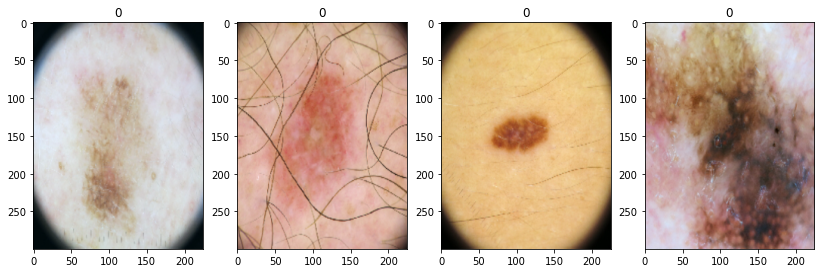

In [ ]:
# print taining data
print('Print training data examples:')
nrows, ncols = 1,4 #print first 4 images
f, axs = plt.subplots(nrows, ncols, figsize=(14,12))
for i in range(ncols):
    axs[i].imshow(array_to_img(X_train[i]))
    axs[i].set(title=y_train[i])

In [ ]:
def build_model(): 
    model = tf.keras.Sequential()

    # add first convolution layer to the model
    model.add(tf.keras.layers.Conv2D(
        filters=32,
        kernel_size=(5, 5),
        strides=(2, 2),
        padding='same',
        data_format='channels_last',
        name='conv_1',
        activation='relu'))


    # add a max pooling layer with pool size (2,2) and strides of 2
    # (this will reduce the spatial dimensions by half)
    model.add(tf.keras.layers.MaxPool2D(
        pool_size=(2, 2),
        name='pool_1'))


    # add second convolutional layer
    model.add(tf.keras.layers.Conv2D(
        filters=64,
        kernel_size=(5, 5),
        strides=(2, 2),
        padding='same',
        name='conv_2',
        activation='relu'))

    # add second max pooling layer with pool size (2,2) and strides of 2
    # (this will further reduce the spatial dimensions by half)
    model.add(tf.keras.layers.MaxPool2D(
        pool_size=(2, 2), name='pool_2')
    )


    # add a fully connected layer (need to flatten the output of the previous layers first)
    model.add(tf.keras.layers.Flatten()) 
    model.add(tf.keras.layers.Dense(
        units=1024,
        name='fc_1', 
        activation='relu'))

    # add dropout layer
    model.add(tf.keras.layers.Dropout(
        rate=0.5))

    # add the last fully connected layer
    # this last layer sets the activation function to "None" in order to output the logits 
    # note that passing activation = "sigmoid" will return class memembership probabilities but
    # in TensorFlow logits are prefered for numerical stability
    # set units=1 to get a single output unit (remember it's a binary classification problem)
    model.add(tf.keras.layers.Dense(
        units=1,
        name='fc_2',
        activation=None))


    # build model and print summary
    tf.random.set_seed(1)
    model.build(input_shape=(None, 300, 225, 3))
    model.summary()
    return model

In [ ]:
model = build_model()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 150, 113, 32)      2432      
                                                                 
 pool_1 (MaxPooling2D)       (None, 75, 56, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 38, 28, 64)        51264     
                                                                 
 pool_2 (MaxPooling2D)       (None, 19, 14, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 17024)             0         
                                                                 
 fc_1 (Dense)                (None, 1024)              17433600  
                                                                 
 dropout_2 (Dropout)         (None, 1024)             

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), #set from_ligits=True because our last layer does not apply sigmoid
              metrics=['accuracy']
             ) 

In [ ]:
# set random seed to get reproductible results 
# neural network algorithms are stochastic (e.g., due to random weight initialization); setting a random seed helps to get more stable results after each run
# however, best way to deal with randomness is to repeat your experiment many times (30+) and use statistics to summarize the performance of the model
tf.random.set_seed(1234)
np.random.seed(1234)
history = model.fit(X_train, y_train,
                    epochs=4, 
                    validation_data=(X_val, y_val),
)

Epoch 1/4
28/28 [==============================] - 29s 1s/step - loss: 0.0223 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/4
28/28 [==============================] - 27s 948ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/4
28/28 [==============================] - 27s 948ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/4
28/28 [==============================] - 26s 946ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


KeyboardInterrupt: ignored

In [ ]:
mel_mini

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
labels_df[labels_df['image'] == 'ISIC_0059872']

,image,type,age_approx,anatom_site_general,lesion_id,sex
16919,ISIC_0059872,AK,75.0,upper extremity,BCN_0004155,female


In [ ]:
labels_df['type'].unique()

array(['NV', 'MEL', 'BKL', 'DF', 'SCC', 'BCC', 'VASC', 'AK'], dtype=object)

In [ ]:
len([img for imx, img in enumerate(os.listdir(IMAGE_PATH + 'AK' + '/'))])

0

In [ ]:
IMAGE_PATH

'/content/drive/MyDrive/w207_final_project/archive/'

# RANDOM FOREST

In [161]:
images = pd.read_csv('/content/drive/MyDrive/w207_final_project/our_images.csv', sep = '\t')
labels_df = labels_df[labels_df['image'].isin(list(images['image_id'].values
                                                   ))][['image', 'type', 'age_approx', 
                                                        'anatom_site_general', 'sex']].dropna()
images_1 = images['image_id'].isin(labels_df['image'].values)


In [174]:
import ast
labels_df = labels_df.sort_values('image')
labels_df['image_data'] = images[images_1].sort_values('image_id')['images'].values

In [186]:
new_mel_df = mel_df[['image', 'age_approx', 'anatom_site_general', 'sex',
       'is_mel']]
new_mel_df['is_mel'] = ["MEL" if i==1 else "Not MEL" for i in new_mel_df['is_mel']]

<ipython-input-186-b18b8caa787c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_mel_df['is_mel'] = ["MEL" if i==1 else "Not MEL" for i in new_mel_df['is_mel']]


In [187]:
new_mel_df['image_data']

,image,age_approx,anatom_site_general,sex,is_mel
7,ISIC_0000008,30.0,anterior torso,female,Not MEL
18,ISIC_0000019_downsampled,30.0,posterior torso,female,Not MEL
21,ISIC_0000022_downsampled,55.0,lower extremity,female,MEL
22,ISIC_0000023_downsampled,30.0,anterior torso,female,Not MEL
23,ISIC_0000024_downsampled,45.0,posterior torso,male,Not MEL
...,...,...,...,...,...
25322,ISIC_0073241,60.0,palms/soles,male,MEL
25325,ISIC_0073246,80.0,anterior torso,male,Not MEL
25326,ISIC_0073247,85.0,head/neck,female,Not MEL
25327,ISIC_0073248,65.0,anterior torso,male,Not MEL


In [177]:
def df_split(df, split=(0.6,0.2,0.2)):
    """ Split data into train, validation and test sets; apply transformaions and augmentations
    
    Params:
    -------
    images  (np.ndarray): Images of shape (N, 224, 224, 3)
    y (np.ndarray): Labels of shape (N,)   
    split (tuple): 3 values summing to 1 defining split of train, validation and test sets
    
    Returns:
    --------
    X_train (np.ndarray): Train images of shape (N_train, 224, 224, 3)
    y_train (np.ndarray): Train labels of shape (N_train,)
    X_val (np.ndarray): Val images of shape (N_val, 224, 224, 3)
    y_val (np.ndarray): Val labels of shape (N_val,)
    X_test (np.ndarray): Test images of shape (N_test, 224, 224, 3)
    y_test (np.ndarray): Test labels of shape (N_test,)
    
    """
    
    ### create train/validation/test sets ###
    #########################################
    # NOTE: Each time you run this cell, you'll re-shuffle the data. The ordering will be the same due to the random seed generator 
    splits = np.multiply(len(df), split).astype(int)
    train, val, test = np.split(df.sample(frac = 1), [splits[0], splits[0]+splits[1]])
    return train,val,test

In [178]:
train_df,val_df,test_df = df_split(new_mel_df)

In [179]:
train_df

,image,age_approx,anatom_site_general,sex,image_data,is_mel
10082,ISIC_0031485,60.0,anterior torso,male,[[[149. 132. 150.]\n [151. 134. 152.]\n [148...,Not MEL
16529,ISIC_0059265,80.0,upper extremity,female,[[[ 1. 1. 1.]\n [ 0. 0. 0.]\n [ 1. 1. ...,Not MEL
19321,ISIC_0063734,75.0,anterior torso,male,[[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]\n .....,Not MEL
24355,ISIC_0071727,80.0,lower extremity,male,[[[0. 0. 0.]\n [0. 0. 0.]\n [1. 1. 1.]\n .....,Not MEL
20758,ISIC_0066039,85.0,anterior torso,female,[[[0. 0. 0.]\n [0. 0. 0.]\n [2. 2. 2.]\n .....,Not MEL
...,...,...,...,...,...,...
14155,ISIC_0055454,85.0,head/neck,female,[[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]\n .....,MEL
17126,ISIC_0060210,80.0,head/neck,male,[[[127. 109. 109.]\n [128. 112. 112.]\n [129...,Not MEL
23801,ISIC_0070830,50.0,lower extremity,female,[[[230. 217. 172.]\n [231. 220. 175.]\n [232...,MEL
17644,ISIC_0061030,45.0,anterior torso,male,[[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]\n .....,Not MEL


In [180]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label='is_mel')
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label='is_mel')

In [181]:
model_1 = tfdf.keras.RandomForestModel(verbose=2)

Use 2 thread(s) for training
Use /tmp/tmpj_v0jic_ as temporary training directory


In [182]:
model_1.fit(x = train_ds)

Reading training dataset...
Training tensor examples:
Features: {'image': <tf.Tensor 'data_2:0' shape=(None,) dtype=string>, 'age_approx': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'anatom_site_general': <tf.Tensor 'data_1:0' shape=(None,) dtype=string>, 'sex': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>, 'image_data': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'image': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_2:0' shape=(None,) dtype=string>), 'age_approx': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'anatom_site_general': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_1:0' shape=(None,) dtype=string>), 'sex': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_4:0' shape=(None,) dtype=string>), 'image_data': SemanticTens

Training dataset read in 0:00:00.251441. Found 6612 examples.
Training model...


[INFO 2022-12-05T01:28:52.767526261+00:00 kernel.cc:814] Start Yggdrasil model training
[INFO 2022-12-05T01:28:52.767570009+00:00 kernel.cc:815] Collect training examples
[INFO 2022-12-05T01:28:52.767640296+00:00 kernel.cc:423] Number of batches: 7
[INFO 2022-12-05T01:28:52.767653275+00:00 kernel.cc:424] Number of examples: 6612
[INFO 2022-12-05T01:28:52.791394872+00:00 data_spec_inference.cc:303] 6612 item(s) have been pruned (i.e. they are considered out of dictionary) for the column image (0 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 2022-12-05T01:28:52.811377687+00:00 data_spec_inference.cc:303] 6000 item(s) have been pruned (i.e. they are considered out of dictionary) for the column image_data (6 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 2022-12-05T01:28:52.827366595+00:00 kernel.cc:837] Training dataset:
Number of records: 6612
Number of columns: 6

Number of columns by type:
	CATEGORICAL: 5 (83.3333

Model trained in 0:00:02.229924
Compiling model...
Model compiled.


In [183]:
model_1.compile(metrics=["accuracy"])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

3/3 [==============================] - 0s 35ms/step - loss: 0.0000e+00 - accuracy: 0.7914

loss: 0.0000
accuracy: 0.7914


In [184]:
tfdf.model_plotter.plot_model_in_colab(model_1)

In [185]:
model_1.make_inspector().features()

["age_approx" (1; #0),
 "anatom_site_general" (4; #1),
 "image" (4; #2),
 "image_data" (4; #3),
 "sex" (4; #4)]

In [77]:
train_df.columns

Index(['image', 'age_approx', 'anatom_site_general', 'sex', 'image_data',
       'is_mel'],
      dtype='object')

In [111]:
model_1.summary()

Model: "random_forest_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (5):
	age_approx
	anatom_site_general
	image
	image_data
	sex

No weights

Variable Importance: MEAN_MIN_DEPTH:
    1.               "image"  8.821412 ################
    2.          "image_data"  8.821412 ################
    3.             "__LABEL"  8.821412 ################
    4.                 "sex"  5.641736 ##########
    5.          "age_approx"  1.693912 ###
    6. "anatom_site_general"  0.000000 

Variable Importance: NUM_AS_ROOT:
    1. "anatom_site_general" 300.000000 

Variable Importance: NUM_NODES:
    1.          "age_approx" 24115.000000 ################
    2. "anatom_site_general" 10919.000000 ###
    3.  

In [96]:
test_ds

<PrefetchDataset element_spec=({'image': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age_approx': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'anatom_site_general': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'sex': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'image_data': TensorSpec(shape=(None,), dtype=tf.string, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>